In [375]:
#import matplotlib
import matplotlib.pyplot as mp
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import numpy as np
import metpy.calc as mpc
import xarray as xr
import scipy.ndimage as ndimage
import pandas as pd
import datetime as dt
#from scam_func import *


In [383]:
#### SCRIPT TO READ IN SCAM OUTPUT AND MAKE SOME PLOTS ####
###### IOP file info. ######

#xr.show_versions()
scam_file_num = '012a'  # For detailed single case analysis



## Multiple cases ##

#scam_file_nums = ['011a','011b','011c','011d']  # For comparisons
#scam_file_nums = ['012a','012b','012c','012d','012e','012f']  # For comparisons
#scam_file_nums = ['012a','012b','012f']
#scam_run_names = ['q_ft','0.5LS.T','no LS.Tq']

#scam_run_names = ['q_ft','0.5LS.T','0.5LS.q','0.5LS.Tq','0.25LS.Tq','no LS.Tq']

#scam_file_nums = ['100a','100','100b','100c']
#scam_file_nums = ['101a','101','101b','101c'] # 'a'=L16, ''=L32
#scam_run_names = ['L16','L32','L64','L128']

scam_file_nums = ['101','102'] # 'a'=L16, ''=L32
scam_run_names = ['CAM6','CAM5']

scam_file_pre = "FSCAM.T42_T42.SAS."
scam_file_suf = ".cam.h0.2013-06-10-43200.nc"

zoffset = 6.


#### PLOTTING ####

pvars_ts1d = np.array(['TS','PBLH','LHFLX','SHFLX','PRECC','PRECL','FLNS']) # D profile timeseries plots
pvars_ts2d = ['TH','THL']

#pvars_ts2d = ['T','Q','RELHUM','TH','THL','CLOUD','ZMDQ','ZMDT', \
#            'STEND_CLUBB','RVMTEND_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','WP3_CLUBB'] # 2D profile timeseries plots

#pvars_ts2d = ['STEND_CLUBB','RVMTEND_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','WP2_CLUBB','WP3_CLUBB'] 
    
#pvars_snap = ['TH','THL']  # Snapshot plotting vars


pvars_anim = np.array(('T','RELHUM','Q'))

tsnaps = np.array([6.,8.,10.,12.,14.,16])     # Time of snapshots (local time)


####### GRAPHICS ########
#mp.interactive(True)
#%matplotlib qt
%matplotlib inline


#### CONSTANTS #####

r_gas = 287.   # Specific gas constant for dry air
cp_air = 1004.6 # Specific heat for dry air
Lv = 2.501e6      # Latent heat of vaporization

r_cp = r_gas/cp_air    # r/cp
grav = 9.81     # Gravity ave.
p0 = 100000. # pref 

###### DERIVED VARS #######
scam_files_in = [scam_file_pre+x+scam_file_suf for x in scam_file_nums]
print('++++ Runs ++++')
print('')
scam_file_in = scam_file_pre+scam_file_num+scam_file_suf 
scam_fig_stub='png/'+'_'.join(scam_file_nums)

rinfo = {}
rinfo['Run Name']  =  scam_run_names
rinfo['File Num']  =  scam_file_nums
rinfo['File Name'] =  scam_files_in

df_rinfo = pd.DataFrame(rinfo)
df_rinfo.style.set_properties(**{'background-color': 'black','color': 'yellow'})
#df_rinfo.style.apply({'background-color': 'white'})
print(df_rinfo)
print('')

##### Point Files #######

scam_in = xr.open_mfdataset(scam_files_in,concat_dim='case', \
                            data_vars=pvars_ts1d,compat='override')
#scam_in = xr.open_mfdataset(scam_files_in,concat_dim='case',combine='by_coords')
xr.set_options(keep_attrs=True)
print(scam_in)
## Dimensions ##

time = scam_in.time
hour_frac = time.time.dt.hour+time.time.dt.minute/60.-zoffset
vplevs = scam_in['lev'].transpose()
ntsnaps = tsnaps.size
ncases = len(scam_file_nums)

## Vertical range to plot

pptop = 200.
ipplevs = np.where(vplevs>=pptop) ; ip0 = np.min(ipplevs) ; ip1 = np.max(ipplevs)
vplevs_v = vplevs[ip0:ip1]

++++ Runs ++++

  Run Name File Num                                         File Name
0     CAM6      101  FSCAM.T42_T42.SAS.101.cam.h0.2013-06-10-43200.nc
1     CAM5      102  FSCAM.T42_T42.SAS.102.cam.h0.2013-06-10-43200.nc



/Users/rneale/miniconda3/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

/Users/rneale/miniconda3/envs/analysis/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied 

ValueError: Cannot specify both coords='different' and compat='override'.

---- PLOTTING 2D TIME/HEIGHT PLOTS------ >>>  
TH  -  Potential Temperature  -- cmin/cmax -->  290 310.0
Case =  101 Range= 293.7477256105939 1293.2477313272989
Case =  102 Range= 293.7678490862137 1294.410909647994


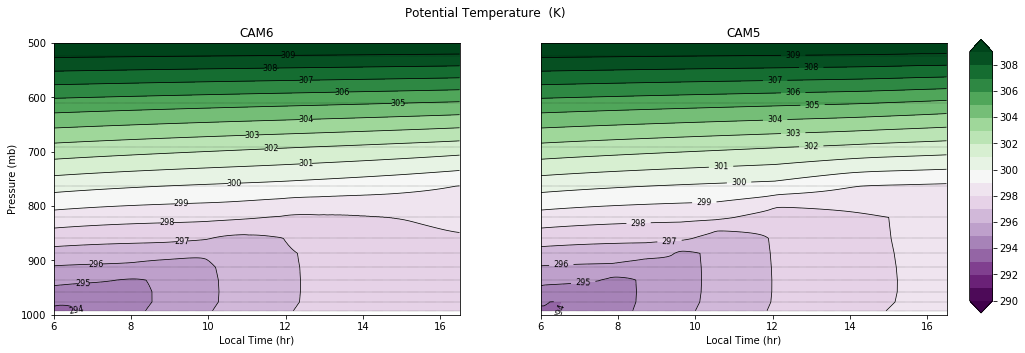

---- PLOTTING 2D TIME/HEIGHT PLOTS------ >>>  
THL  -  Liq. Water Potential Temperature  -- cmin/cmax -->  270 310.0
Case =  101 Range= 264.66313530982524 1293.213864284085
Case =  102 Range= 264.6494510535818 1294.3770624797344


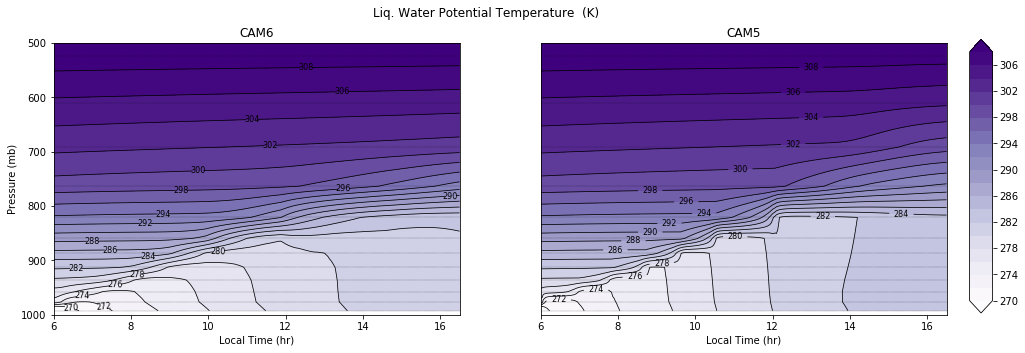

In [377]:
###### Plotting ##########

#plot1d_ts_scam()   # 1D time series plots
plot2d_ts_scam()   # 2D time series plots
#plot1d_snap_scam()   # 1D snapshot plots
#plot1d_anim_scam() # 2D animation  plots


In [323]:
#fig = mp.figure()
#ax = mp.axes(xlim=(0, 4), ylim=(-2, 2))
#line, = ax.plot([], [], lw=3)

#def init():
#    line.set_data([], [])
#    return line,
#def animate(i):
#    x = np.linspace(0, 4, 1000)
#    y = np.sin(2 * np.pi * (x - 0.01 * i))
#    line.set_data(x, y)
#    return line,

#anim = FuncAnimation(fig, animate, init_func=init,
##                               frames=100, interval=40, blit=True)
#HTML(anim.to_html5_video())


#mp.show()

#fig.show()
#anim.save('sine_wave.gif', writer='imagemagick')


In [307]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "none"

In [318]:

################################
#   1D Timeseries plotting     #
################################


def plot1d_ts_scam():
    
    plot1d_dic = {}

    plot1d_dic['LHFLX']  = [1.,0.,300]
    plot1d_dic['SHFLX']  = [1.,0., 300]
    plot1d_dic['TS']     = [1., 290., 300.]
    plot1d_dic['PBLH']   = [1., 0., 1000.]
    plot1d_dic['PRECL']  = [86400.*1000., 0., 10.]
    plot1d_dic['PRECC']  = [86400.*1000., 0., 10.]
    plot1d_dic['FLNS']   = [1., 200., 800.]
    plot1d_dic['CAPE']   = [1., 0., 800.]

    plot1d_df = pd.DataFrame(plot1d_dic,index=['vscale','cmin','cmax'])
    print(plot1d_df)
    
    vleg_left = ['PBLH']
    

## 1D PLOTS ##
#mp.rcParams['figure.dpi'] = 50

    for var in pvars_ts1d:
 
        vscale = plot1d_dic[var][0] ; cmin = plot1d_dic[var][1] ; cmax = plot1d_dic[var][2]
       
        vleg_x=0.085 if var in vleg_left else 0.97
            
        with xr.set_options(keep_attrs=True): 
            pvar = vscale*scam_in[var].isel(lat=0,lon=0)

#        # Fig. setup
        print('---- PLOTTING 1D TIME PLOTS ------>>>  ',pvar.attrs['long_name'])
#     
        # Loop cases and plot
        for icase in range(0,ncases):
            
            pvarp = pvar[icase,:] 
            print(scam_file_nums[icase], ' --cmin/cmax --> ',  np.min(pvarp.values),np.max(pvarp.values))
            mp.plot(hour_frac,pvarp)

    
    # Axes stuff
        mp.xlabel("Local Time (hr)")
        mp.ylabel(pvar.attrs['units'])
        mp.title(pvar.attrs['long_name'])
        
        mp.legend(labels=scam_run_names, ncol=1, fontsize="medium",
                columnspacing=1.0, labelspacing=0.8, bbox_to_anchor= (vleg_x, 0.83),
                handletextpad=0.5, handlelength=1.5, borderaxespad=-5,
                framealpha=1.0,frameon=True)
#        mp.show()
        mp.savefig(scam_fig_stub+'_plot1d_ts_scam_'+var+'.png', dpi=300)     
        mp.close()
        
        
        
        
   

In [342]:
############################################
#  2D Time/Height Timeseries Plotting info. #
############################################ 


def plot2d_ts_scam():

    plot2d_dic = {}

    plot2d_dic['T']      = [1.,260.,305.,-20.,20.,scam_in['T'].attrs['units']]
    plot2d_dic['RELHUM'] = [1.,10., 120.,-100.,100.,'%']
    plot2d_dic['CLOUD']  = [100., 0., 100.,-80.,80.,'%']
    plot2d_dic['Q']      = [1000., 1., 12.,-5,5.,'g/kg']
   
    plot2d_dic['DCQ']  = [1000., -5., 5.,-5.,5.,'g/kg/day']
    plot2d_dic['TH']  = [1., 290, 310.,-20.,20.,scam_in['T'].attrs['units']]
    plot2d_dic['THL']  = [1., 270, 310.,-20.,20.,scam_in['T'].attrs['units']]
    plot2d_dic['ZMDT']  = [86400., -10., 10.,-10.,10.,'K/day']
    plot2d_dic['ZMDQ']  = [86400.*1000., -2, 2.,-8.,8.,'g/kg/day']
    
    plot2d_dic['WPRTP_CLUBB'] = [1., -0., 600.,-50.,50.,scam_in['WPRTP_CLUBB'].attrs['units']]
    plot2d_dic['WPTHLP_CLUBB'] = [1., -100., 100.,-50.,50.,scam_in['WPTHLP_CLUBB'].attrs['units']]
    plot2d_dic['WPTHVP_CLUBB'] = [1., -100., 100.,-50.,50.,scam_in['WPTHVP_CLUBB'].attrs['units']]
    
    plot2d_dic['THLP2_CLUBB'] = [1., 0., 0.05,-50.,50.,scam_in['THLP2_CLUBB'].attrs['units']]   
    plot2d_dic['WP2_CLUBB']      = [1., 0., 1.,-0.5,0.5,scam_in['WP2_CLUBB'].attrs['units']] 

    plot2d_dic['WP3_CLUBB']      = [1., 0., 0.5,-0.2,0.2,scam_in['WP3_CLUBB'].attrs['units']]
    
    plot2d_dic['STEND_CLUBB']    = [86400./1000., -20, 20,-2.,2.,'K/day'] #J/kg.s -> K/day
    plot2d_dic['RVMTEND_CLUBB']  = [1000.*86400, -50., 50.,-20.,20.,'g/kg/day']
    
    var_cmap0 = ['T','RELHUM','Q','CLOUD','THL','WPRTP_CLUBB','WP2_CLUBB','WP3_CLUBB','THLP2_CLUBB']
    plot2d_df = pd.DataFrame(plot2d_dic,index=['vscale','cmin','cmax','acmin','acmax','units'])
   
    print(plot2d_df.style.set_table_styles([{'selector':'','props':[('border','4px solid #7a7')]}]))
#   print(plot2d_df)

    nclevs = 20 # Number of contour levels
    ppmin = 500. ; ppmax = 1000. # Pressure (mb) plot range
    ptype = 'full' # Full/anom/diff 
    cmap_full = 'Purples'
    cmap_anom = 'PRGn'
    
    
   
    
## TIME/HEIGHT PLOTTING ##
    
    ## VARIABLE LOOP ##
    for var in pvars_ts2d:

        pvar = None
        
        
## VAR specific Scaling and contour intervals ##
        
        vscale = plot2d_dic[var][0] ; cmin = plot2d_dic[var][1] ; cmax = plot2d_dic[var][2]
        plevels = np.arange(cmin,cmax,(cmax-cmin)/nclevs)        
            
        acmin = plot2d_dic[var][3] ; acmax = plot2d_dic[var][4]
        aplevels = np.arange(acmin,acmax,(acmax-acmin)/nclevs)
        
        if ptype =='full': aplevels=plevels # Set to plevels if all full fields
    
        # Color maps for negative valued filled.
        pcmap=cmap_full if var in var_cmap0 else cmap_anom
       
### First case plot (could be only plot)
        scam_icase = xr.open_dataset(scam_files_in[0],engine='netcdf4') 
    
### Derived Met variables
     
        if var in (['TH','THL']) : 
                pvar = scam_icase['T'].isel(lat=0,lon=0).transpose()*(0.01*p0/scam_icase['lev'])**r_cp 
                pvar.attrs['long_name'] = 'Potential Temperature' 
                pvar.attrs['units'] = 'K' 
                theta = pvar
        if var =='THL': 
                pvar = theta-(theta/scam_icase['T'].isel(lat=0,lon=0).transpose()) \
                    *(Lv/cp_air)*scam_icase['Q'].isel(lat=0,lon=0).transpose() 
                pvar.attrs['long_name'] = 'Liq. Water Potential Temperature'
                pvar.attrs['units'] = 'K' 
           
        if pvar is None :  # Set pvar if not already.
            pvar = scam_icase[var].isel(lat=0,lon=0).transpose()

### Determine Vertical Coord/Dim (lev/ilev)
        plev = scam_icase['ilev'] if 'ilev' in pvar.dims else scam_icase['lev']
       
        
        print('---- PLOTTING 2D TIME/HEIGHT PLOTS------ >>>  ')
        print(' - ',var,' - ',pvar.attrs['long_name'],' -- cmin/cmax --> ',cmin,cmax)               
        print('Case = ',scam_file_nums[0],'Range=',np.min(pvar.values),np.max(pvar.values))
        
##############             
# First plot #
##############

        fig1 = mp.figure(figsize=(16, 5))
        ax1 = fig1.add_subplot(111)
        pvar0 = vscale*pvar
       
#        pvarp = pvarp-pvarp[:,0] # Remove initial column values
        
        plt0 = ax1.contourf(hour_frac,plev,pvar0,levels=plevels,cmap=pcmap,extend='both')   
        if ptype !='full': mp.colorbar(plt0, extend='both')
        plt0 = ax1.contour(hour_frac,plev,pvar0,levels=plevels,colors='black',linewidths=0.75)       
        
        ax1.clabel(plt0, fontsize=8, colors='black', fmt='%1.0f')

        mp.hlines(plev, min(hour_frac), max(hour_frac), linestyle="dotted",lw=0.4)
        mp.suptitle(pvar.attrs['long_name']+(' - CLUBB' if 'CLUBB' in var else ' ')+' ('+plot2d_dic[var][5]+')')
        
        ax1.set_title(scam_run_names[0])
        ax1.set_ylabel('Pressure (mb)') 
        ax1.set_xlabel("Local Time (hr)")  
        ax1.set_ylim(ppmin, ppmax)
        ax1.invert_yaxis()  
        
            
#################################
# Loop for subsequent sub-plots #
#################################

        nn = len(fig1.axes)
    
        for icase in range(1,ncases):
           
            pvarp = None
        
            scam_icase = xr.open_dataset(scam_files_in[icase],engine='netcdf4')
            
            if var in (['TH','THL']) : 
                pvarp = scam_icase['T'].isel(lat=0,lon=0).transpose()*(0.01*p0/scam_icase['lev'])**r_cp 
                pvarp.attrs['long_name'] = "Potential Temperature" 
                pvarp.attrs['units'] = "K" 
                theta = pvarp
            if var =='THL': 
                pvarp = theta-(theta/scam_icase['T'].isel(lat=0,lon=0).transpose()) \
                    *(Lv/cp_air)*scam_icase['Q'].isel(lat=0,lon=0).transpose() 
                pvarp.attrs['long_name'] = "Liq. Water Potential Temperature"
          
            
            if pvarp is None :  # Set pvar if not already.
                pvarp = vscale*scam_icase[var].isel(lat=0,lon=0).transpose()
            
### Determine Vertial Coord (lev/ilev)
            plev = scam_icase['ilev'] if 'ilev' in pvar.dims else scam_icase['lev']
                       
            print('Case = ',scam_file_nums[icase],'Range=',np.min(pvarp.values),np.max(pvarp.values))
            
            # Remove initial column values (anom) or case0 (diff)
            if ptype == 'anom' : pvarp = pvarp-pvar0 ; pcmap = cmap_anom
            if ptype == 'diff' : pvarp = pvarp-pvarp[:,0] ; pcmap = cmap_anom

### Reshape sub-fig placements            

            nn = len(fig1.axes)
           
            for i in range(nn):
                fig1.axes[i].change_geometry(1, nn+1, i+1)
            ax1 = fig1.add_subplot(1, nn+1, nn+1)
  
              
            pvarp_sm = pvarp
        #pvarp_sm = ndimage.gaussian_filter(pvarp, sigma=1, order=0)
 
      
            plt0 = ax1.contourf(hour_frac,plev,pvarp_sm,levels=aplevels,cmap=pcmap,extend='both')

            # Squeeze in colorbar here so it doesn't get messed up by line contours
            mp.hlines(plev, min(hour_frac), max(hour_frac), linestyle="dotted",lw=0.4)

            if icase==ncases-1: 
                mp.subplots_adjust(right=0.9)  
                mp.colorbar(plt0, extend='both',cax=fig1.add_axes([0.92,  0.13, 0.02, 0.76]))
            plt0 = ax1.contour(hour_frac,plev,pvarp_sm,levels=aplevels, colors='black',linewidths=0.75)
            
                
            ax1.clabel(plt0, fontsize=8, colors='black', fmt='%1.0f')
            
            
            
            ax1.set_title(scam_run_names[icase])
            ax1.set_xlabel("Local Time (hr)")
            ax1.set_ylim(ppmin, ppmax)
           
            ax1.yaxis.set_visible(False) # Remove y labels
            ax1.invert_yaxis()  
            
## Plot ##
        mp.savefig(scam_fig_stub+'_plot2d_ts_scam_'+var+'.png', dpi=300)              
        mp.show()
        
        del pvar       
        
        
        
     

In [276]:
   
        
        
        
##########################################
# 2D Snapshot/Height Timeseries Plotting info.
##########################################


def plot1d_snap_scam():
              
    for var in pvars_snap:

        pvar = None

        if var =='TH' : pvar = scam_in['T'].isel(lat=0,lon=0)*(0.01*p0/vplevs)**r_cp ; pvar.attrs['long_name'] = "Potential Temperature" ; pvar.attrs['units'] = "K" ; theta = pvar
        if var =='THL': pvar = theta-(theta/scam_in['T'].isel(lat=0,lon=0))*(Lv/cp_air)*scam_in['Q'].isel(lat=0,lon=0) ; pvar.attrs['long_name'] = "Liq. Water Potential Temperature"

        if pvar is None :  # Set pvar if not already.
            pvar = scam_in[var].isel(lat=0,lon=0)

        print('------ SNAPSHOTS ------>>>  ',var,' --- ',pvar.attrs['long_name'],' -- min/max --> ',  np.min(pvar.values),np.max(pvar.values))

        # Plot several different functions...

        labelspacing = []
        labels = []

        ## Loop Snapshot Times ##

        for ii in range(0, ntsnaps): 
            itt = np.min(np.where(hour_frac==tsnaps[ii]))
            pvar_v = pvar[itt,ip0:ip1]
            mp.plot(pvar_v,vplevs_v)

    #        if var not in ['T','TH','THL']: mp.vlines(0, 0, scam_in[pvar.dims[1]].max(), linestyle="dashed",lw=1)
            mp.hlines(vplevs_v, min(pvar_v), max(pvar_v), linestyle="dotted",lw=0.04)

######### END of snapshot loop #########

    # Legend
        mp.title(pvar.attrs['long_name']+' ('+pvar.attrs['units']+')')
        mp.legend(labels=tsnaps, ncol=2, loc="center right", 
                columnspacing=1.0, labelspacing=1, 
                handletextpad=0.5, handlelength=0.5, frameon=False)
        print(pvar.attrs['units'])
        mp.gca().invert_yaxis()
        mp.show()
        del pvar       

        
        
        
        
        
        
        

In [256]:

#########################################
# 1D/TIME ANIMATIONS
#########################################

        
        
        
        
def plot1d_anim_scam():
    
    nanim_vars = pvars_anim.size
    
#    fig, ax = mp.subplots(nrows=1, ncols=nanim_vars,figsize=(15, 5)))
   
    
# 
#    def init():
#        line.set_data([], [])
#        return line,
#    def animate(i):
#        x = np.linspace(0, 4, 1000)
#        y = np.sin(2 * np.pi * (x - 0.01 * i))
#        line.set_data(x, y)
#        return line,

#    line, = ax.plot(x, np.sin(x))
          
    for var in pvars_anim:

        pvar = None

        if var in ('TH','THL') : pvar = scam_icase['T'].isel(lat=0,lon=0)*(0.01*p0/vplevs)**r_cp ; pvar.attrs['long_name'] = "Potential Temperature" ; pvar.attrs['units'] = "K" ; theta = pvar
        if var =='THL': pvar = theta-(theta/scam_icase['T'].isel(lat=0,lon=0))*(Lv/cp_air)*scam_icase['Q'].isel(lat=0,lon=0) ; pvar.attrs['long_name'] = "Liq. Water Potential Temperature"

            
            
        if pvar is None :  # Set pvar if not already.
            pvar = scam_in[var].isel(lat=0,lon=0)

        print('------ Animations ------>>>  ',var,' --- ',pvar.attrs['long_name'],' -- min/max --> ',  np.min(pvar.values),np.max(pvar.values))

    # Dynamically allocate subplots and animate Animate

#    ax.plot(pvar[0,:],vplevs) ;  ax.invert_yaxis()
    
  
    fig = mp.figure()
    
    
# Plotting frame.    
    ax = fig.add_subplot(111)
    ax.set_ylabel('mb') 
    for ip in range(1,5):
        n = len(fig.axes)
        print(n)
        for i in range(n):
            fig.axes[i].change_geometry(1, n+1, i+1)
        ax = fig.add_subplot(1, n+1, n+1)   
        
    def animate(ii):
        print(n)
        for i in range(n):
            ax[n].plot[i](pvar[ii,:],vplevs) 
    
#        del fig.axes
#        mp.show()
#        return ax
        
        
#    def animate(ii):
#        print(len(fig.axes))
#        ax = fig.add_subplot(111)
#        
#        ax.set_ylabel('mb') 
#        ax.plot(pvar[ii,:],vplevs) ;  ax.invert_yaxis()
#        for ip in range(1,2):
#            n = len(fig.axes)
#            print("hi2",n)
#            for i in range(n):
#                fig.axes[i].change_geometry(1, n+1, i+1)
#            ax = fig.add_subplot(1, n+1, n+1)
#            ax.plot(pvar[ii,:],vplevs) ;  ax.invert_yaxis()
#        del fig.axes
#        mp.show()
#        return ax
    print(fig.axes)
    animate(0)
    mp.show()
    
#    print(fig)
#    animate(1)
#    print(fig)
#    animate(200)
        
#
#       def init():
#        line.set_data([], [])
#        return line,     
    
#       def animate(i):
#        x = np.linspace(0, 4, 1000)
#        y = np.sin(2 * np.pi * (x - 0.01 * i))
#        line.set_data(x, y)
#        return line, 
#        for ip in range(pvars_anim.size-1):
#            n = len(fig.axes)
#            for i in range(n):
#                fig.axes[i].change_geometry(1, n+1, i+1)
#            ax = fig.add_subplot(1, n+1, n+1)
#            ax.plot(pvar[0,:],vplevs) ;  ax.invert_yaxis()
        
        
    anim = FuncAnimation(fig, animate, frames=np.arange(1,10))
#    print(anim)
    #    mp.show()
    mp.show()
    HTML(anim.to_html5_video())

    del pvar
    
   